# Just for fun: An example how to create an interactive plot
(With no attempts here for optimized computational performance) 


In this notebook we put to work several Python coding elements that we have introduced in our course:
- list objects and their functionality that allows us to append and remove elements from the list during runtime of the script
- matplotlib functions like plt.plot
    - here in a slighty more advanced method in which we construct figure objects, and plot axes system
    - the whole canvas we can then redraw and this way we can make the plot interactive
    - if-else statements are used here to control the plotting behavior 
    - while loop is use to repeat the plotting of the data points
    - provide a function that we just have to learn how to use it (_getcheerlights()_)
    
# You can interact with this Notebook by tweeting your favorite color:

Example Tweet

    @CheerLights Paint the town red
    
   
Follow this link for [technical details](https://cheerlights.com/cheerlights-api/)
or checkout [the Twitter page](https://twitter.com/cheerlights?lang=en)


In [1]:
%matplotlib notebook

# Import additional packages that provide useful functions
# Get the packages support to make http requests
import urllib3
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getcheerlights():
    """gets the latest cheerlights color and return the RGB value"""
    colorcodes={"red":"#FF0000","green":"#008000","blue":"#0000FF","cyan":"00FFFF",
            "white":"#FFFFFF","warmwhite":"#FDF5E6","oldlace":"#FDF5E6",
            "purple":"#800080","magenta":"#FF00FF","yellow":"#FFFF00",
            "orange":"FFA500","pink":"#FFC0CB"}
    cheerlights_url="http://api.thingspeak.com/channels/1417/field/2/last.txt"
    result="#AAAAAA"
    try: 
        http = urllib3.PoolManager()
        r = http.request('GET', cheerlights_url)
        result=r.data.decode('utf-8') # returns a dictionary 
        # find our key from value (clumsy but it works)
        for key,val in colorcodes.items():
            if val==result:
                colorname=key
            else:
                colorname="RGB-levels"
        timestamp=time.ctime()
        #print (timestamp+":"+" color via Twitter @cheerlights :"+
        #    colorname+" ("+str(result)+")")
    except urllib.error.URLError as e:
        print("Error while reading data from URL")
        print(e.reason)
        print("exit loop gracefully!")
    return result

In [3]:
test=getcheerlights()

#00ffff


<IPython.core.display.Javascript object>


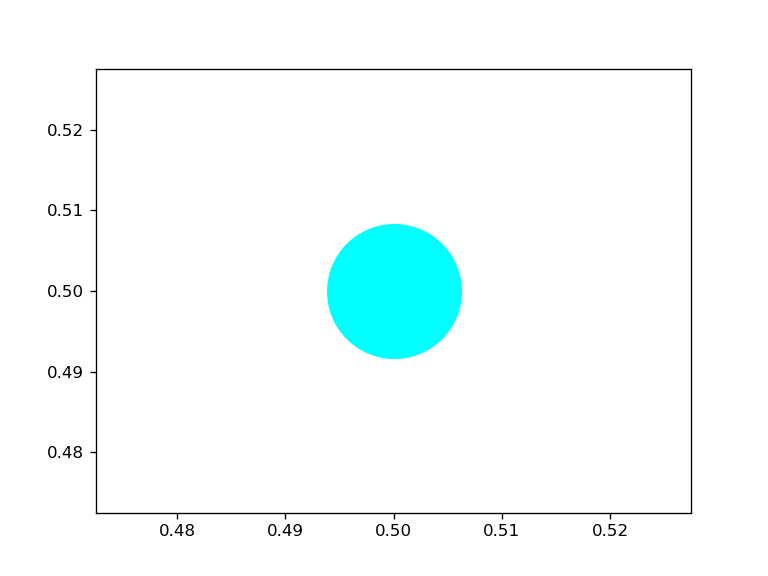

In [4]:
x=0.5
y=0.5
size=1
col=getcheerlights()
print(col)
plt.plot(x,y,'o',markersize=80,color=col)
plt.show()


## Interactive plot

<IPython.core.display.Javascript object>


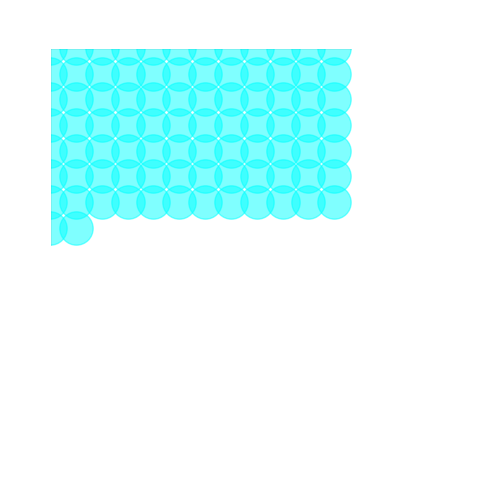

In [ ]:
plt.ion() # interactice plot

fig = plt.figure(figsize=(4, 4))
ax = plt.axes()


size=24
maxwidth=12
maxheight=12




ax.set_xlim(0,maxwidth)
ax.set_ylim(0,maxheight)
fig.canvas.draw()
fig.show()

i,j=0,0
x=0
y=0
k=0
while k<maxwidth*maxheight:
    if j==maxwidth:
        j=0
        i=i+1
    if (i==maxheight):
        i=0
    x=j
    y=maxheight-i
    col=getcheerlights()
    ax.plot(x,y,'o',markersize=size,color=col,alpha=0.5)
    k=k+1
    j=j+1
    fig.canvas.draw()
    time.sleep(1)

In [ ]:
plt.ion() # interactice plot

fig = plt.figure(figsize=(4, 4))
ax = plt.axes()
i=0
xcenter=0
ycenter=0
xpos, ypos = [],[]

xpos.append(xcenter),
ypos.append(ycenter)

# colors 
col=getcheerlights()
colorlist=[]

colorlist.append(col)




#ax.plot(xpos,ypos,'o',color=col,markersize=20)
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
fig.canvas.draw()
fig.show()
maxpoints=100
alphavalues=np.arange(0,maxpoints,1.0)/maxpoints
i=0
while i<1000:
    col=getcheerlights()
    xpos.append(xpos[-1]+np.random.uniform(-100,100,size=1))
    ypos.append(ypos[-1]+np.random.uniform(-100,100,size=1))
    colorlist.append(col)
    k=0
    ax.plot(0,0,'o',color='white',markersize=800)
    for c in colorlist:
        ax.plot(xpos[k],ypos[k],'o',markersize=20,color=col,alpha=alphavalues[k])
        k=k+1
    if len(colorlist)==maxpoints:
        colorlist.pop(0)
        xpos.pop(0)
        ypos.pop(0)
    fig.canvas.draw()
    time.sleep(0.5)
    #print (i,xpos,ypos,col)
    i=i+1